<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

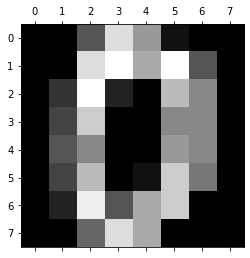

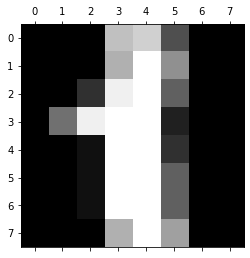

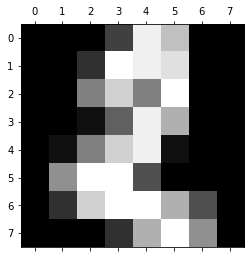

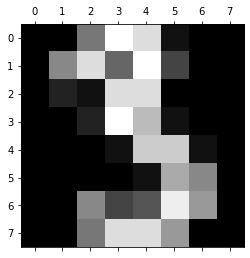

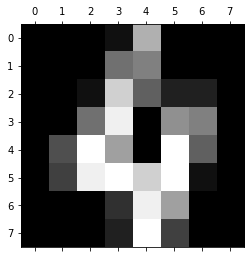

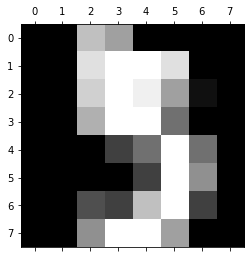

In [3]:
plt.gray() 
for i in range(6):
    plt.matshow(digits.images[i]) 

In [9]:
digits.data.shape

(1797, 64)

In [14]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
print(len(X_train))
print(len(X_test))

1437
360


In [27]:
model.fit(X_train, y_train)

d:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [31]:
model.score(X_test, y_test)

0.9555555555555556

In [30]:
model.predict(digits.data[0:15])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [36]:
y_predicted = model.predict(X_test)
y_predicted

array([7, 2, 7, 9, 9, 0, 9, 6, 8, 0, 5, 4, 2, 1, 1, 2, 0, 0, 2, 3, 6, 6,
       6, 2, 0, 8, 3, 2, 2, 3, 7, 2, 1, 5, 6, 9, 8, 0, 6, 5, 9, 7, 2, 1,
       5, 8, 2, 5, 6, 7, 7, 0, 7, 8, 9, 5, 9, 8, 0, 6, 3, 7, 3, 3, 1, 6,
       1, 0, 0, 5, 5, 3, 0, 4, 1, 3, 8, 7, 9, 3, 6, 4, 3, 8, 8, 4, 6, 9,
       3, 5, 1, 4, 9, 9, 6, 4, 0, 3, 1, 1, 1, 8, 9, 7, 3, 1, 6, 8, 8, 2,
       7, 9, 2, 9, 2, 3, 1, 0, 1, 7, 7, 9, 5, 5, 4, 4, 5, 5, 7, 6, 6, 9,
       2, 9, 2, 9, 5, 2, 3, 6, 3, 8, 7, 3, 5, 4, 4, 8, 6, 6, 1, 7, 9, 7,
       9, 3, 0, 8, 1, 9, 9, 8, 4, 8, 7, 3, 6, 8, 8, 8, 3, 7, 4, 6, 4, 5,
       2, 2, 2, 6, 3, 2, 9, 0, 6, 9, 9, 5, 4, 7, 5, 4, 1, 6, 0, 6, 5, 1,
       2, 4, 2, 3, 3, 0, 5, 7, 2, 4, 9, 2, 8, 1, 2, 7, 6, 5, 2, 5, 3, 3,
       7, 2, 9, 2, 4, 9, 9, 6, 7, 8, 6, 5, 8, 9, 0, 6, 1, 7, 4, 9, 2, 2,
       9, 1, 1, 0, 1, 3, 6, 6, 0, 3, 6, 4, 9, 2, 3, 4, 4, 1, 2, 1, 7, 3,
       8, 1, 4, 5, 0, 3, 2, 1, 0, 6, 8, 0, 7, 6, 8, 0, 5, 1, 8, 9, 5, 9,
       9, 0, 9, 5, 1, 1, 4, 7, 7, 8, 3, 8, 3, 5, 1,

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  2],
       [ 0,  1,  0,  0, 28,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 31,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0,  1, 34,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [39]:
pip install seaborn

Text(69.0, 0.5, 'Truth')

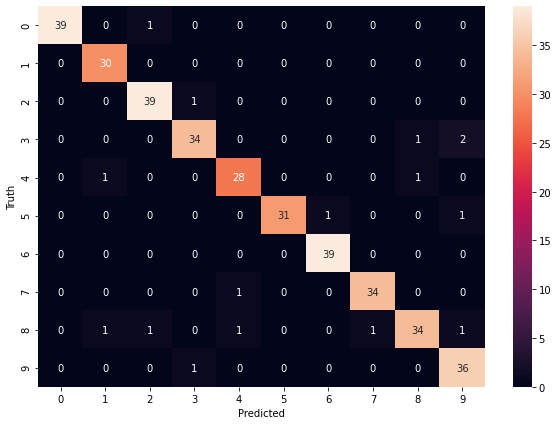

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')